This is the script used to train de MGD NN

In [1]:
###########Import modules##############
import os
os.environ['PYTHONHASHSEED']='0'
import pandas as pd
import numpy as np
import tensorflow as tf
import random
#force CPU to guarantee repetable results (issue with GPU seeding)
#comment the line to allow GPU training (if your system is configured and supports it)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

seed = 191119 #random seed
random.seed(seed)
np.random.seed(seed)

import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Activation, ActivityRegularization, Dropout
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from keras import optimizers
import matplotlib.pyplot as plt
from keras import backend as K
from keras import regularizers, initializers
from keras.callbacks import EarlyStopping

tf.set_random_seed(seed)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

/home/rodrigomassera92/Python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rodrigomassera92/Python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rodrigomassera92/Python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rodrigomassera92/Python36/lib/python3.6/site-pack

In [2]:
############Read the data###########
df = pd.read_csv('mgd_data.txt', sep='\t')


#just in case, find if any duplicate exists
df.drop_duplicates(subset=['Energy (keV)', 'Breast Radius (cm)', 'Breast Thickness (cm)', 'Breast Glandularity', 
       'Skin Thickness (mm)', 'Adipose Thickness (mm)'], inplace=True)
df.reset_index(inplace=True, drop=True)

#return df shape
print(df.shape)

(262223, 9)


In [3]:
#Our feature matrix
X = df[['Energy (keV)', 'Breast Radius (cm)', 'Breast Thickness (cm)', 'Breast Glandularity', 
       'Skin Thickness (mm)', 'Adipose Thickness (mm)']].values


#Our label vector, notice the min norm
Y = (df[['MGD(mGy/hist)', 'Rel. Error']].values)




In [4]:
#Here we separate train and test samples (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed,shuffle=True)

######Apply min max transformation into X train
min_max_scaler = preprocessing.MinMaxScaler() #preprocessing.StandardScaler()
X_train = min_max_scaler.fit_transform(X_train)

minimum =  np.min(y_train[:,0])

np.savetxt('trained_model/dgm_min_norm_value.txt', [minimum])

y_train[:,0] = y_train[:,0]/minimum

In [5]:
#start k fold
kf = KFold(n_splits=5, random_state=seed, shuffle=True)

Train on 167822 samples, validate on 41956 samples
Epoch 1/500
167822/167822 [==============================] - 23s 136us/step - loss: 87.8014 - mean_absolute_percentage_error: 83.9828 - val_loss: 76.4566 - val_mean_absolute_percentage_error: 68.5450
Epoch 2/500
167822/167822 [==============================] - 23s 135us/step - loss: 72.1088 - mean_absolute_percentage_error: 64.5192 - val_loss: 68.4741 - val_mean_absolute_percentage_error: 58.6711
Epoch 3/500
167822/167822 [==============================] - 22s 133us/step - loss: 65.4969 - mean_absolute_percentage_error: 56.0524 - val_loss: 62.3885 - val_mean_absolute_percentage_error: 49.5371
Epoch 4/500
167822/167822 [==============================] - 22s 134us/step - loss: 59.6132 - mean_absolute_percentage_error: 47.4248 - val_loss: 56.4132 - val_mean_absolute_percentage_error: 40.6892
Epoch 5/500
167822/167822 [==============================] - 23s 137us/step - loss: 53.4727 - mean_absolute_percentage_error: 37.7121 - val_loss: 50.

167822/167822 [==============================] - 23s 135us/step - loss: 7.1255 - mean_absolute_percentage_error: 0.4740 - val_loss: 7.0270 - val_mean_absolute_percentage_error: 0.5167
Epoch 43/500
167822/167822 [==============================] - 23s 136us/step - loss: 7.0204 - mean_absolute_percentage_error: 0.4741 - val_loss: 6.9872 - val_mean_absolute_percentage_error: 0.5271
Epoch 44/500
167822/167822 [==============================] - 23s 136us/step - loss: 6.9173 - mean_absolute_percentage_error: 0.4708 - val_loss: 6.8617 - val_mean_absolute_percentage_error: 0.4486
Epoch 45/500
167822/167822 [==============================] - 23s 137us/step - loss: 6.8151 - mean_absolute_percentage_error: 0.4608 - val_loss: 6.6259 - val_mean_absolute_percentage_error: 0.3529
Epoch 46/500
167822/167822 [==============================] - 23s 136us/step - loss: 6.7090 - mean_absolute_percentage_error: 0.4423 - val_loss: 6.7783 - val_mean_absolute_percentage_error: 0.5397
Epoch 47/500
167822/167822 [

Epoch 84/500
167822/167822 [==============================] - 23s 135us/step - loss: 4.8260 - mean_absolute_percentage_error: 0.3604 - val_loss: 4.6980 - val_mean_absolute_percentage_error: 0.2717
Epoch 85/500
167822/167822 [==============================] - 23s 135us/step - loss: 4.8009 - mean_absolute_percentage_error: 0.3624 - val_loss: 4.7651 - val_mean_absolute_percentage_error: 0.3532
Epoch 86/500
167822/167822 [==============================] - 23s 136us/step - loss: 4.7724 - mean_absolute_percentage_error: 0.3600 - val_loss: 4.7366 - val_mean_absolute_percentage_error: 0.3555
Epoch 87/500
167822/167822 [==============================] - 23s 136us/step - loss: 4.7447 - mean_absolute_percentage_error: 0.3580 - val_loss: 4.6947 - val_mean_absolute_percentage_error: 0.3693
Epoch 88/500
167822/167822 [==============================] - 22s 134us/step - loss: 4.7151 - mean_absolute_percentage_error: 0.3540 - val_loss: 4.6254 - val_mean_absolute_percentage_error: 0.2966
Epoch 89/500
16

167822/167822 [==============================] - 23s 136us/step - loss: 4.0109 - mean_absolute_percentage_error: 0.3249 - val_loss: 3.9317 - val_mean_absolute_percentage_error: 0.2789
Epoch 126/500
167822/167822 [==============================] - 23s 136us/step - loss: 3.9992 - mean_absolute_percentage_error: 0.3268 - val_loss: 3.9629 - val_mean_absolute_percentage_error: 0.3115
Epoch 127/500
167822/167822 [==============================] - 23s 134us/step - loss: 3.9762 - mean_absolute_percentage_error: 0.3171 - val_loss: 3.9774 - val_mean_absolute_percentage_error: 0.3439
Epoch 128/500
167822/167822 [==============================] - 23s 135us/step - loss: 3.9719 - mean_absolute_percentage_error: 0.3262 - val_loss: 3.8998 - val_mean_absolute_percentage_error: 0.2963
Epoch 129/500
167822/167822 [==============================] - 23s 136us/step - loss: 3.9599 - mean_absolute_percentage_error: 0.3273 - val_loss: 3.9255 - val_mean_absolute_percentage_error: 0.3193
Epoch 130/500
167822/167

167822/167822 [==============================] - 23s 135us/step - loss: 3.5566 - mean_absolute_percentage_error: 0.3042 - val_loss: 3.4748 - val_mean_absolute_percentage_error: 0.2478
Epoch 167/500
167822/167822 [==============================] - 23s 136us/step - loss: 3.5456 - mean_absolute_percentage_error: 0.3020 - val_loss: 3.4662 - val_mean_absolute_percentage_error: 0.2445
Epoch 168/500
167822/167822 [==============================] - 23s 135us/step - loss: 3.5427 - mean_absolute_percentage_error: 0.3073 - val_loss: 3.4911 - val_mean_absolute_percentage_error: 0.2748
Epoch 169/500
167822/167822 [==============================] - 23s 136us/step - loss: 3.5309 - mean_absolute_percentage_error: 0.3038 - val_loss: 3.4939 - val_mean_absolute_percentage_error: 0.2939
Epoch 170/500
167822/167822 [==============================] - 23s 137us/step - loss: 3.5201 - mean_absolute_percentage_error: 0.3006 - val_loss: 3.4792 - val_mean_absolute_percentage_error: 0.2755
Epoch 171/500
167822/167

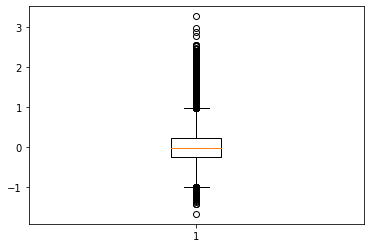

Train on 167822 samples, validate on 41956 samples
Epoch 1/500
167822/167822 [==============================] - 23s 139us/step - loss: 88.2443 - mean_absolute_percentage_error: 84.5011 - val_loss: 77.2363 - val_mean_absolute_percentage_error: 70.0201
Epoch 2/500
167822/167822 [==============================] - 23s 137us/step - loss: 72.4530 - mean_absolute_percentage_error: 64.8421 - val_loss: 68.5063 - val_mean_absolute_percentage_error: 59.2646
Epoch 3/500
167822/167822 [==============================] - 23s 134us/step - loss: 65.7260 - mean_absolute_percentage_error: 56.2958 - val_loss: 63.0081 - val_mean_absolute_percentage_error: 50.2671
Epoch 4/500
167822/167822 [==============================] - 23s 137us/step - loss: 59.9997 - mean_absolute_percentage_error: 47.9455 - val_loss: 57.2129 - val_mean_absolute_percentage_error: 42.0903
Epoch 5/500
167822/167822 [==============================] - 23s 137us/step - loss: 53.9545 - mean_absolute_percentage_error: 38.4519 - val_loss: 51.

167822/167822 [==============================] - 23s 136us/step - loss: 7.2392 - mean_absolute_percentage_error: 0.5098 - val_loss: 7.2125 - val_mean_absolute_percentage_error: 0.4563
Epoch 43/500
167822/167822 [==============================] - 23s 137us/step - loss: 7.1211 - mean_absolute_percentage_error: 0.4912 - val_loss: 7.1048 - val_mean_absolute_percentage_error: 0.4645
Epoch 44/500
167822/167822 [==============================] - 23s 137us/step - loss: 7.0020 - mean_absolute_percentage_error: 0.4679 - val_loss: 7.0414 - val_mean_absolute_percentage_error: 0.4571
Epoch 45/500
167822/167822 [==============================] - 23s 137us/step - loss: 6.9128 - mean_absolute_percentage_error: 0.4725 - val_loss: 6.8659 - val_mean_absolute_percentage_error: 0.3850
Epoch 46/500
167822/167822 [==============================] - 23s 137us/step - loss: 6.8256 - mean_absolute_percentage_error: 0.4745 - val_loss: 6.8342 - val_mean_absolute_percentage_error: 0.5002
Epoch 47/500
167822/167822 [

Epoch 84/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.8929 - mean_absolute_percentage_error: 0.3702 - val_loss: 4.8414 - val_mean_absolute_percentage_error: 0.2950
Epoch 85/500
167822/167822 [==============================] - 23s 136us/step - loss: 4.8668 - mean_absolute_percentage_error: 0.3715 - val_loss: 4.8641 - val_mean_absolute_percentage_error: 0.3432
Epoch 86/500
167822/167822 [==============================] - 23s 136us/step - loss: 4.8466 - mean_absolute_percentage_error: 0.3776 - val_loss: 4.8516 - val_mean_absolute_percentage_error: 0.3374
Epoch 87/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.8101 - mean_absolute_percentage_error: 0.3665 - val_loss: 4.7790 - val_mean_absolute_percentage_error: 0.3112
Epoch 88/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.7783 - mean_absolute_percentage_error: 0.3598 - val_loss: 4.7384 - val_mean_absolute_percentage_error: 0.2897
Epoch 89/500
16

167822/167822 [==============================] - 23s 138us/step - loss: 4.0647 - mean_absolute_percentage_error: 0.3366 - val_loss: 4.0989 - val_mean_absolute_percentage_error: 0.3453
Epoch 126/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.0504 - mean_absolute_percentage_error: 0.3352 - val_loss: 4.0457 - val_mean_absolute_percentage_error: 0.2930
Epoch 127/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.0307 - mean_absolute_percentage_error: 0.3283 - val_loss: 4.0137 - val_mean_absolute_percentage_error: 0.2828
Epoch 128/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.0186 - mean_absolute_percentage_error: 0.3291 - val_loss: 4.0280 - val_mean_absolute_percentage_error: 0.3207
Epoch 129/500
167822/167822 [==============================] - 23s 138us/step - loss: 4.0051 - mean_absolute_percentage_error: 0.3289 - val_loss: 3.9771 - val_mean_absolute_percentage_error: 0.2781
Epoch 130/500
167822/167

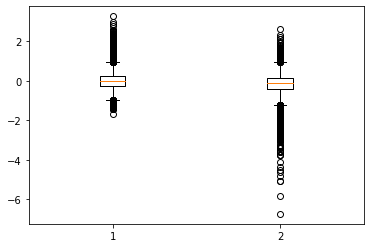

Train on 167822 samples, validate on 41956 samples
Epoch 1/500
167822/167822 [==============================] - 23s 139us/step - loss: 88.0855 - mean_absolute_percentage_error: 84.3580 - val_loss: 76.7175 - val_mean_absolute_percentage_error: 68.7735
Epoch 2/500
167822/167822 [==============================] - 23s 137us/step - loss: 72.4264 - mean_absolute_percentage_error: 64.8966 - val_loss: 69.0509 - val_mean_absolute_percentage_error: 59.3913
Epoch 3/500
167822/167822 [==============================] - 23s 137us/step - loss: 65.9495 - mean_absolute_percentage_error: 56.6917 - val_loss: 63.4090 - val_mean_absolute_percentage_error: 51.2883
Epoch 4/500
167822/167822 [==============================] - 23s 136us/step - loss: 60.4854 - mean_absolute_percentage_error: 48.7441 - val_loss: 57.8327 - val_mean_absolute_percentage_error: 42.2666
Epoch 5/500
167822/167822 [==============================] - 22s 134us/step - loss: 54.7089 - mean_absolute_percentage_error: 39.6861 - val_loss: 51.

167822/167822 [==============================] - 23s 137us/step - loss: 7.3586 - mean_absolute_percentage_error: 0.4805 - val_loss: 7.3580 - val_mean_absolute_percentage_error: 0.5591
Epoch 43/500
167822/167822 [==============================] - 23s 138us/step - loss: 7.2397 - mean_absolute_percentage_error: 0.4688 - val_loss: 7.1902 - val_mean_absolute_percentage_error: 0.4617
Epoch 44/500
167822/167822 [==============================] - 23s 137us/step - loss: 7.1477 - mean_absolute_percentage_error: 0.4827 - val_loss: 7.0480 - val_mean_absolute_percentage_error: 0.4188
Epoch 45/500
167822/167822 [==============================] - 23s 137us/step - loss: 7.0349 - mean_absolute_percentage_error: 0.4696 - val_loss: 6.9230 - val_mean_absolute_percentage_error: 0.4148
Epoch 46/500
167822/167822 [==============================] - 23s 136us/step - loss: 6.9157 - mean_absolute_percentage_error: 0.4447 - val_loss: 6.8145 - val_mean_absolute_percentage_error: 0.3735
Epoch 47/500
167822/167822 [

Epoch 84/500
167822/167822 [==============================] - 23s 135us/step - loss: 4.9355 - mean_absolute_percentage_error: 0.3676 - val_loss: 4.8716 - val_mean_absolute_percentage_error: 0.3036
Epoch 85/500
167822/167822 [==============================] - 23s 136us/step - loss: 4.9099 - mean_absolute_percentage_error: 0.3699 - val_loss: 4.8511 - val_mean_absolute_percentage_error: 0.3366
Epoch 86/500
167822/167822 [==============================] - 23s 136us/step - loss: 4.8776 - mean_absolute_percentage_error: 0.3658 - val_loss: 4.8483 - val_mean_absolute_percentage_error: 0.3291
Epoch 87/500
167822/167822 [==============================] - 23s 136us/step - loss: 4.8486 - mean_absolute_percentage_error: 0.3635 - val_loss: 4.8350 - val_mean_absolute_percentage_error: 0.3441
Epoch 88/500
167822/167822 [==============================] - 23s 138us/step - loss: 4.8226 - mean_absolute_percentage_error: 0.3642 - val_loss: 4.8490 - val_mean_absolute_percentage_error: 0.4142
Epoch 89/500
16

167822/167822 [==============================] - 23s 137us/step - loss: 4.0855 - mean_absolute_percentage_error: 0.3241 - val_loss: 4.0707 - val_mean_absolute_percentage_error: 0.2929
Epoch 126/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.0725 - mean_absolute_percentage_error: 0.3252 - val_loss: 4.0227 - val_mean_absolute_percentage_error: 0.2763
Epoch 127/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.0630 - mean_absolute_percentage_error: 0.3297 - val_loss: 4.0815 - val_mean_absolute_percentage_error: 0.3292
Epoch 128/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.0476 - mean_absolute_percentage_error: 0.3280 - val_loss: 4.1081 - val_mean_absolute_percentage_error: 0.3764
Epoch 129/500
167822/167822 [==============================] - 23s 137us/step - loss: 4.0347 - mean_absolute_percentage_error: 0.3279 - val_loss: 3.9797 - val_mean_absolute_percentage_error: 0.2764
Epoch 130/500
167822/167

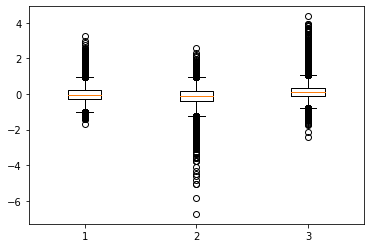

Train on 167823 samples, validate on 41955 samples
Epoch 1/500
167823/167823 [==============================] - 23s 140us/step - loss: 87.5477 - mean_absolute_percentage_error: 83.6568 - val_loss: 76.4467 - val_mean_absolute_percentage_error: 68.8891
Epoch 2/500
167823/167823 [==============================] - 23s 138us/step - loss: 71.8229 - mean_absolute_percentage_error: 64.1758 - val_loss: 68.3314 - val_mean_absolute_percentage_error: 58.0513
Epoch 3/500
167823/167823 [==============================] - 23s 138us/step - loss: 65.3190 - mean_absolute_percentage_error: 55.8148 - val_loss: 62.3205 - val_mean_absolute_percentage_error: 49.4236
Epoch 4/500
167823/167823 [==============================] - 23s 137us/step - loss: 59.6186 - mean_absolute_percentage_error: 47.4272 - val_loss: 56.9491 - val_mean_absolute_percentage_error: 41.3077
Epoch 5/500
167823/167823 [==============================] - 23s 138us/step - loss: 53.5944 - mean_absolute_percentage_error: 37.9346 - val_loss: 51.

167823/167823 [==============================] - 23s 137us/step - loss: 7.2605 - mean_absolute_percentage_error: 0.4815 - val_loss: 7.0737 - val_mean_absolute_percentage_error: 0.3854
Epoch 43/500
167823/167823 [==============================] - 23s 137us/step - loss: 7.1457 - mean_absolute_percentage_error: 0.4688 - val_loss: 7.3184 - val_mean_absolute_percentage_error: 0.7051
Epoch 44/500
167823/167823 [==============================] - 23s 137us/step - loss: 7.0446 - mean_absolute_percentage_error: 0.4648 - val_loss: 7.0588 - val_mean_absolute_percentage_error: 0.5062
Epoch 45/500
167823/167823 [==============================] - 23s 136us/step - loss: 6.9405 - mean_absolute_percentage_error: 0.4556 - val_loss: 6.7788 - val_mean_absolute_percentage_error: 0.3962
Epoch 46/500
167823/167823 [==============================] - 23s 135us/step - loss: 6.8420 - mean_absolute_percentage_error: 0.4503 - val_loss: 6.6656 - val_mean_absolute_percentage_error: 0.3470
Epoch 47/500
167823/167823 [

Epoch 84/500
167823/167823 [==============================] - 23s 138us/step - loss: 4.9082 - mean_absolute_percentage_error: 0.3605 - val_loss: 4.8716 - val_mean_absolute_percentage_error: 0.3639
Epoch 85/500
167823/167823 [==============================] - 23s 138us/step - loss: 4.8774 - mean_absolute_percentage_error: 0.3573 - val_loss: 4.8257 - val_mean_absolute_percentage_error: 0.3575
Epoch 86/500
167823/167823 [==============================] - 23s 138us/step - loss: 4.8535 - mean_absolute_percentage_error: 0.3606 - val_loss: 4.7679 - val_mean_absolute_percentage_error: 0.3056
Epoch 87/500
167823/167823 [==============================] - 23s 138us/step - loss: 4.8205 - mean_absolute_percentage_error: 0.3549 - val_loss: 4.7745 - val_mean_absolute_percentage_error: 0.3302
Epoch 88/500
167823/167823 [==============================] - 23s 138us/step - loss: 4.8040 - mean_absolute_percentage_error: 0.3654 - val_loss: 4.7048 - val_mean_absolute_percentage_error: 0.3111
Epoch 89/500
16

167823/167823 [==============================] - 23s 138us/step - loss: 4.0778 - mean_absolute_percentage_error: 0.3288 - val_loss: 4.0679 - val_mean_absolute_percentage_error: 0.3497
Epoch 126/500
167823/167823 [==============================] - 23s 138us/step - loss: 4.0719 - mean_absolute_percentage_error: 0.3373 - val_loss: 4.0460 - val_mean_absolute_percentage_error: 0.3498
Epoch 127/500
167823/167823 [==============================] - 23s 138us/step - loss: 4.0483 - mean_absolute_percentage_error: 0.3270 - val_loss: 3.9832 - val_mean_absolute_percentage_error: 0.2947
Epoch 128/500
167823/167823 [==============================] - 23s 138us/step - loss: 4.0326 - mean_absolute_percentage_error: 0.3249 - val_loss: 4.0365 - val_mean_absolute_percentage_error: 0.3427
Epoch 129/500
167823/167823 [==============================] - 23s 137us/step - loss: 4.0236 - mean_absolute_percentage_error: 0.3287 - val_loss: 3.9438 - val_mean_absolute_percentage_error: 0.2744
Epoch 130/500
167823/167

167823/167823 [==============================] - 23s 136us/step - loss: 3.6196 - mean_absolute_percentage_error: 0.3095 - val_loss: 3.5737 - val_mean_absolute_percentage_error: 0.2837
Epoch 167/500
167823/167823 [==============================] - 23s 137us/step - loss: 3.6144 - mean_absolute_percentage_error: 0.3131 - val_loss: 3.5644 - val_mean_absolute_percentage_error: 0.2785
Epoch 168/500
167823/167823 [==============================] - 23s 137us/step - loss: 3.5979 - mean_absolute_percentage_error: 0.3043 - val_loss: 3.5458 - val_mean_absolute_percentage_error: 0.2722
Epoch 169/500
167823/167823 [==============================] - 23s 136us/step - loss: 3.5924 - mean_absolute_percentage_error: 0.3070 - val_loss: 3.5254 - val_mean_absolute_percentage_error: 0.2608
Epoch 170/500
167823/167823 [==============================] - 23s 137us/step - loss: 3.5832 - mean_absolute_percentage_error: 0.3059 - val_loss: 3.5290 - val_mean_absolute_percentage_error: 0.2732
Epoch 171/500
167823/167

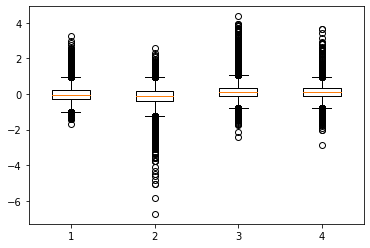

Train on 167823 samples, validate on 41955 samples
Epoch 1/500
167823/167823 [==============================] - 24s 141us/step - loss: 87.7992 - mean_absolute_percentage_error: 83.9843 - val_loss: 75.8098 - val_mean_absolute_percentage_error: 67.9794
Epoch 2/500
167823/167823 [==============================] - 23s 138us/step - loss: 71.4465 - mean_absolute_percentage_error: 63.7234 - val_loss: 67.6217 - val_mean_absolute_percentage_error: 57.6939
Epoch 3/500
167823/167823 [==============================] - 23s 138us/step - loss: 64.7003 - mean_absolute_percentage_error: 54.9338 - val_loss: 62.1748 - val_mean_absolute_percentage_error: 48.9429
Epoch 4/500
167823/167823 [==============================] - 23s 138us/step - loss: 58.6219 - mean_absolute_percentage_error: 45.9019 - val_loss: 55.4691 - val_mean_absolute_percentage_error: 38.5079
Epoch 5/500
167823/167823 [==============================] - 23s 138us/step - loss: 52.2624 - mean_absolute_percentage_error: 35.8164 - val_loss: 48.

167823/167823 [==============================] - 23s 136us/step - loss: 7.0252 - mean_absolute_percentage_error: 0.4800 - val_loss: 6.8919 - val_mean_absolute_percentage_error: 0.3768
Epoch 43/500
167823/167823 [==============================] - 23s 138us/step - loss: 6.9315 - mean_absolute_percentage_error: 0.4841 - val_loss: 6.9556 - val_mean_absolute_percentage_error: 0.5398
Epoch 44/500
167823/167823 [==============================] - 23s 138us/step - loss: 6.8284 - mean_absolute_percentage_error: 0.4723 - val_loss: 6.8242 - val_mean_absolute_percentage_error: 0.4439
Epoch 45/500
167823/167823 [==============================] - 23s 138us/step - loss: 6.7276 - mean_absolute_percentage_error: 0.4596 - val_loss: 6.6777 - val_mean_absolute_percentage_error: 0.4677
Epoch 46/500
167823/167823 [==============================] - 23s 138us/step - loss: 6.6476 - mean_absolute_percentage_error: 0.4644 - val_loss: 6.5927 - val_mean_absolute_percentage_error: 0.4210
Epoch 47/500
167823/167823 [

Epoch 84/500
167823/167823 [==============================] - 23s 139us/step - loss: 4.7966 - mean_absolute_percentage_error: 0.3701 - val_loss: 4.7773 - val_mean_absolute_percentage_error: 0.3482
Epoch 85/500
167823/167823 [==============================] - 23s 138us/step - loss: 4.7670 - mean_absolute_percentage_error: 0.3660 - val_loss: 4.8518 - val_mean_absolute_percentage_error: 0.4628
Epoch 86/500
167823/167823 [==============================] - 23s 136us/step - loss: 4.7409 - mean_absolute_percentage_error: 0.3641 - val_loss: 4.6721 - val_mean_absolute_percentage_error: 0.2963
Epoch 87/500
167823/167823 [==============================] - 23s 137us/step - loss: 4.7081 - mean_absolute_percentage_error: 0.3562 - val_loss: 4.6449 - val_mean_absolute_percentage_error: 0.2952
Epoch 88/500
167823/167823 [==============================] - 23s 137us/step - loss: 4.6762 - mean_absolute_percentage_error: 0.3493 - val_loss: 4.7150 - val_mean_absolute_percentage_error: 0.3706
Epoch 89/500
16

167823/167823 [==============================] - 23s 137us/step - loss: 3.9849 - mean_absolute_percentage_error: 0.3238 - val_loss: 4.0300 - val_mean_absolute_percentage_error: 0.3881
Epoch 126/500
167823/167823 [==============================] - 23s 138us/step - loss: 3.9735 - mean_absolute_percentage_error: 0.3256 - val_loss: 3.9574 - val_mean_absolute_percentage_error: 0.3096
Epoch 127/500
167823/167823 [==============================] - 23s 138us/step - loss: 3.9666 - mean_absolute_percentage_error: 0.3318 - val_loss: 4.0258 - val_mean_absolute_percentage_error: 0.3753
Epoch 128/500
167823/167823 [==============================] - 23s 138us/step - loss: 3.9485 - mean_absolute_percentage_error: 0.3265 - val_loss: 3.8924 - val_mean_absolute_percentage_error: 0.2698
Epoch 129/500
167823/167823 [==============================] - 23s 138us/step - loss: 3.9274 - mean_absolute_percentage_error: 0.3183 - val_loss: 3.8731 - val_mean_absolute_percentage_error: 0.2628
Epoch 130/500
167823/167

167823/167823 [==============================] - 23s 137us/step - loss: 3.5397 - mean_absolute_percentage_error: 0.3052 - val_loss: 3.5058 - val_mean_absolute_percentage_error: 0.2729
Epoch 167/500
167823/167823 [==============================] - 23s 136us/step - loss: 3.5327 - mean_absolute_percentage_error: 0.3063 - val_loss: 3.4947 - val_mean_absolute_percentage_error: 0.2616
Epoch 168/500
167823/167823 [==============================] - 23s 137us/step - loss: 3.5236 - mean_absolute_percentage_error: 0.3053 - val_loss: 3.4868 - val_mean_absolute_percentage_error: 0.2711
Epoch 169/500
167823/167823 [==============================] - 23s 138us/step - loss: 3.5175 - mean_absolute_percentage_error: 0.3071 - val_loss: 3.4707 - val_mean_absolute_percentage_error: 0.2613
Epoch 170/500
167823/167823 [==============================] - 23s 137us/step - loss: 3.5072 - mean_absolute_percentage_error: 0.3050 - val_loss: 3.4932 - val_mean_absolute_percentage_error: 0.2897
Epoch 171/500
167823/167

167823/167823 [==============================] - 23s 137us/step - loss: 3.2500 - mean_absolute_percentage_error: 0.2942 - val_loss: 3.2556 - val_mean_absolute_percentage_error: 0.2952
Epoch 208/500
167823/167823 [==============================] - 23s 138us/step - loss: 3.2469 - mean_absolute_percentage_error: 0.2968 - val_loss: 3.2006 - val_mean_absolute_percentage_error: 0.2450
Epoch 209/500
167823/167823 [==============================] - 23s 137us/step - loss: 3.2392 - mean_absolute_percentage_error: 0.2945 - val_loss: 3.2718 - val_mean_absolute_percentage_error: 0.3373
Epoch 210/500
167823/167823 [==============================] - 23s 137us/step - loss: 3.2366 - mean_absolute_percentage_error: 0.2972 - val_loss: 3.1959 - val_mean_absolute_percentage_error: 0.2577
Epoch 211/500
167823/167823 [==============================] - 23s 137us/step - loss: 3.2260 - mean_absolute_percentage_error: 0.2918 - val_loss: 3.2041 - val_mean_absolute_percentage_error: 0.2762
Epoch 212/500
167823/167

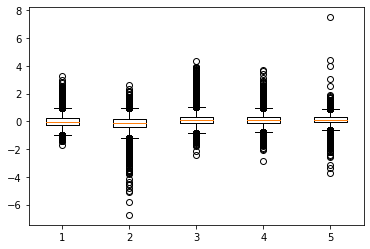

In [6]:
model_vec = []
error_vec = []

#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

my_init = initializers.glorot_uniform(seed=seed)


for train_index, test_index in kf.split(X_train):
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    
    y_gen = np.random.normal(y_train1[:,0], scale = y_train1[:,0]*y_train1[:,1]*0.5)

    model = Sequential()
    #First layer
    model.add(Dense(500,input_dim=6, activation='relu', kernel_regularizer=regularizers.l2(0.000),
                    activity_regularizer=regularizers.l2(0.0001), 
                    kernel_initializer=my_init))
    #Second layer
    model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000),
                    activity_regularizer=regularizers.l2(0.0001), 
                    kernel_initializer=my_init))
    #Third layer
    model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000),
                    activity_regularizer=regularizers.l2(0.0001), 
                    kernel_initializer=my_init))
    #linear output
    model.add(Dense(1))
    
    #optimizer
    adam = optimizers.Adam(lr=0.001, decay=0.0001)

    model.compile(optimizer=adam,
              loss='mean_absolute_percentage_error',
              metrics=['mape'])
    
    #train

    model.fit(X_train1, y_gen, epochs=500, batch_size=250, verbose=1, 
              validation_data=(X_test1,y_test1[:,0]), callbacks=[early_stopping])

    #append trained model
    model_vec.append(model)
    
    

    #calculateds the % of the training error
    y = (model.predict(X_test1))
    y = np.ravel(y)
    error = 100*(y- y_test1[:,0])/y_test1[:,0]
    error_vec.append(error)
    
    plt.boxplot(error_vec)
    plt.show()


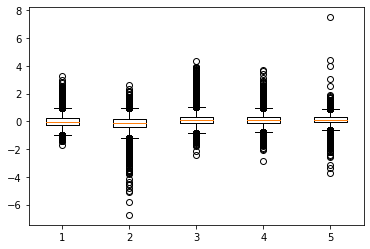

In [7]:
#plots training error
plt.boxplot(error_vec)
plt.show()



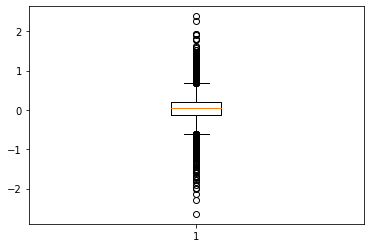

In [8]:
#Compares with the validation data
#First transform X val.
X_test_minmax = min_max_scaler.transform(X_test)

#For all trained models, evaluate
y_predict_vec = []
for model in model_vec:
    y_predict = model.predict(X_test_minmax)
    y_predict = y_predict*minimum
    y_predict_vec.append(y_predict)
    
    
#average between models
y_mean = np.mean(y_predict_vec, axis=0)
y_mean = np.ravel(y_mean)
#std between models
y_std = np.std(y_predict_vec, axis=0, ddof=1)
y_std = np.ravel(y_std)

#difference
dif = 100*(y_mean-y_test[:,0])/y_test[:,0]

#boxplot of the validation error distribution
plt.boxplot([dif])
plt.show()


#output for error distribution
np.savetxt('y_mean_dgm.out', y_mean)
np.savetxt('y_test_dgm.out', y_test)

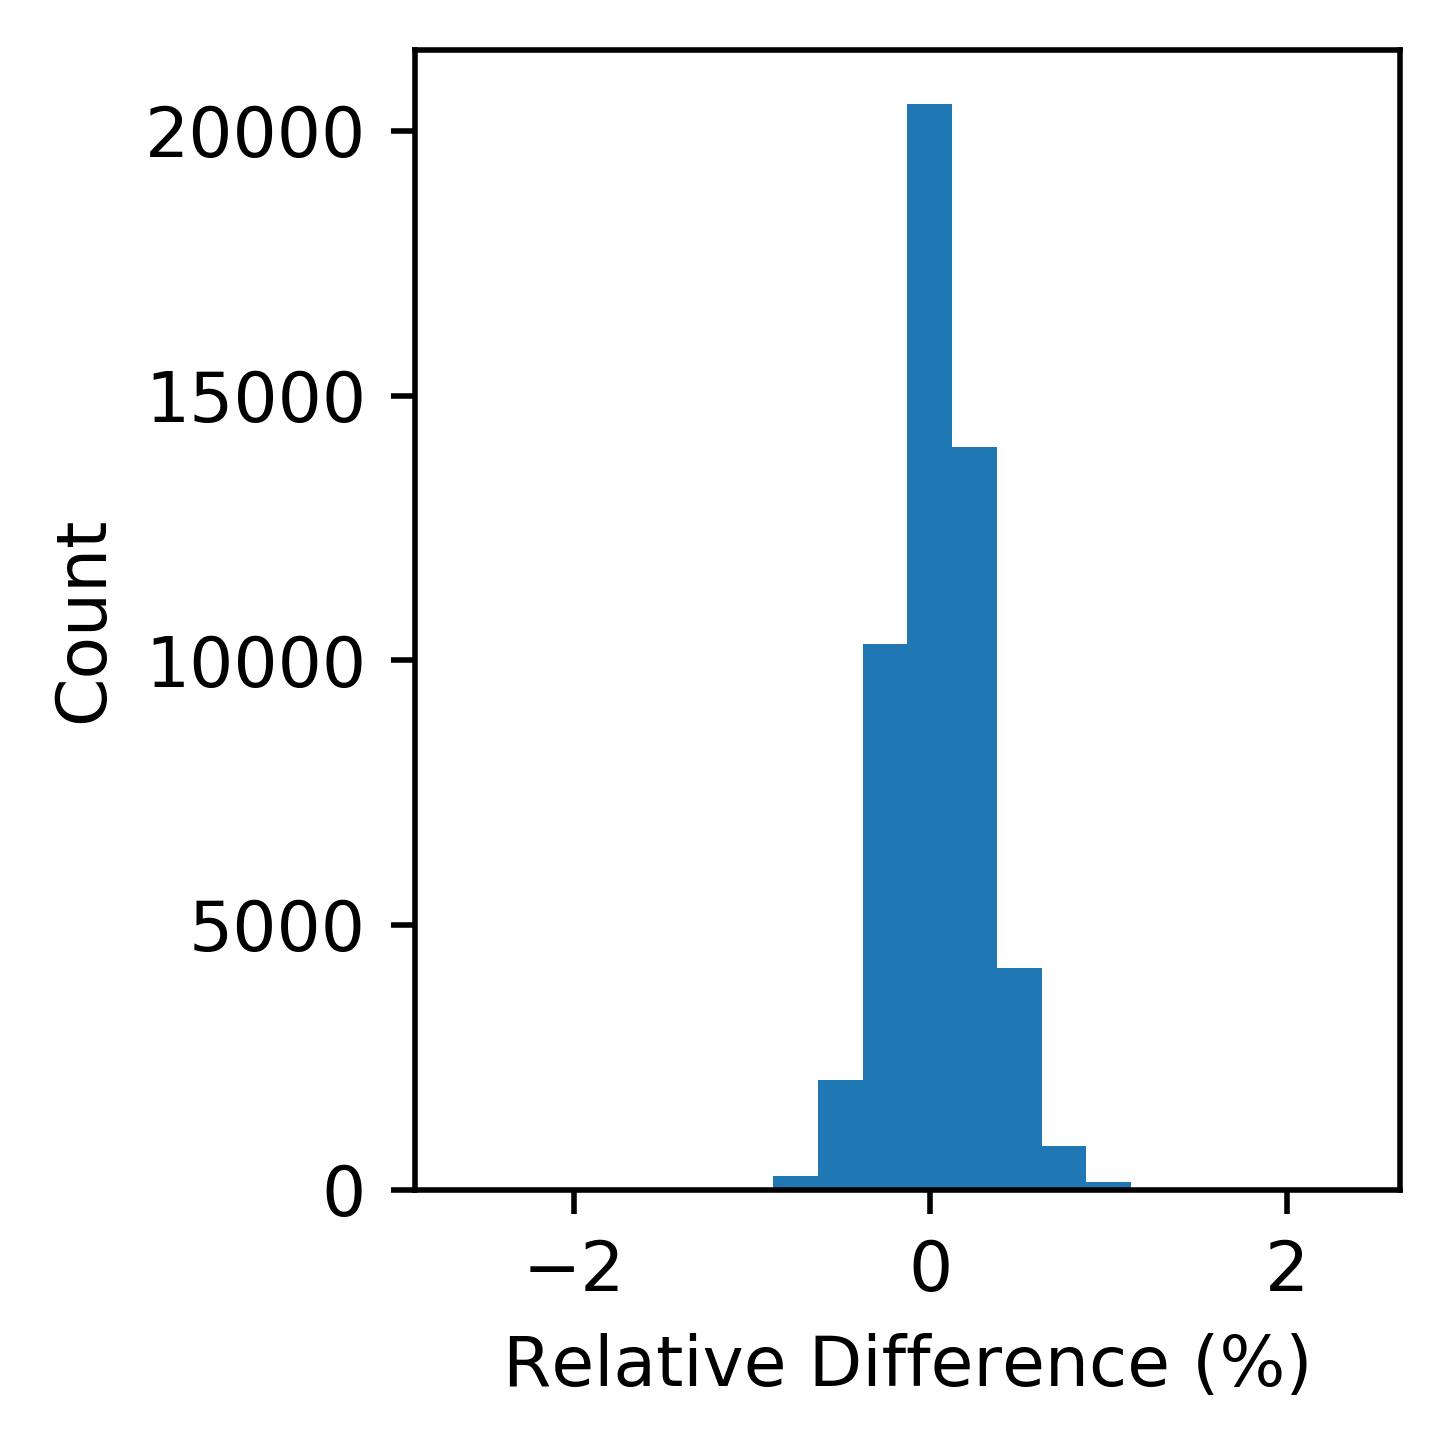

In [9]:
#plots error distribution
plt.figure(figsize=(3,3), dpi=500)
plt.hist(dif, bins=20)
plt.xlabel('Relative Difference (%)', size=10)
plt.ylabel('Count', size=10)
plt.tight_layout()
plt.show()

0.9993776537859134 2.8603003735486067e-16 0.9999844806998265


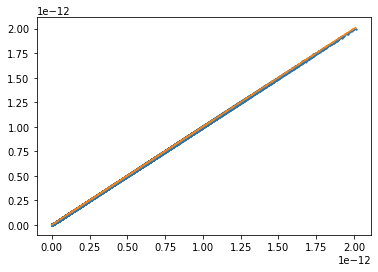

In [10]:
#adjust line between test and predict values
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test[:,0],y_mean)
print(slope, intercept, r_value**2)

plt.plot(y_test[:,0], y_mean, 'o', ms=1)
plt.plot(y_test[:,0], y_test[:,0], ls='--')
plt.show()

In [11]:
import h5py
#saves trained models
for idx,model in enumerate(model_vec):
    model.save('trained_model/trained_model'+str(idx)+'.h5')
    
    
import pickle
#saves scaler
with open("trained_model/min_max.pkl", 'wb') as file:
    pickle.dump(min_max_scaler, file)
    file.close()

In [12]:
np.save('error_vec_training_dgm', error_vec)